# Tesla stock price prediction using Prophet





Import necessary libraries

In [2]:
!pip install prophet

In [3]:
import prophet

In [4]:
import pandas as pd
import plotly.express as px

In [5]:
#Initializing Plotly
import plotly.io as pio
pio.renderers.default = "colab"

Import the dataset and Explore the dataset

In [6]:
df = pd.read_csv('TSLA.csv')

In [7]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-06-12,247.940002,250.970001,244.589996,249.830002,249.830002,150337900
1,2023-06-13,253.509995,259.679993,251.339996,258.709991,258.709991,162384300
2,2023-06-14,260.170013,261.570007,250.500000,256.790009,256.790009,170575500
3,2023-06-15,248.399994,258.950012,247.289993,255.899994,255.899994,160171200
4,2023-06-16,258.920013,263.600006,257.209991,260.540009,260.540009,167563700


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       251 non-null    object 
 1   Open       251 non-null    float64
 2   High       251 non-null    float64
 3   Low        251 non-null    float64
 4   Close      251 non-null    float64
 5   Adj Close  251 non-null    float64
 6   Volume     251 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [9]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,220.294224,224.381116,216.065537,220.241394,220.241394,1.112427e+08
std,37.307979,37.818282,36.686866,37.330881,37.330881,2.849545e+07
min,140.559998,144.440002,138.800003,142.050003,142.050003,5.077460e+07
25%,182.625000,184.729996,177.485001,180.900002,180.900002,9.340635e+07
50%,229.339996,233.970001,225.380005,230.039993,230.039993,1.088617e+08
75%,251.674995,257.985001,247.359993,252.859993,252.859993,1.250550e+08
max,296.040009,299.290009,289.519989,293.339996,293.339996,2.438697e+08


Data Visualiztion using plotly express

In [10]:
#area graph between Date and Close price
px.area(df, x='Date', y='Close', title='TSLA Stock Price')

In [11]:
#line graph
px.line(df,x='Date',y="Close", title='TSLA line graph')

In [12]:
#area graph for daily transational volume
px.area(df, x= 'Date',y = 'Volume')

In [13]:
px.bar(df, x='Date', y='Volume')

In [15]:
#box plot for close column
px.box(df, y= 'Close')

Understanding Facebook Prophet

1. Accurate and Fast
2. Reliable
3. Fully Automatic
4. Available in R and Python

Data Preparation

In [16]:
#Create new dataframe
ndf = df[['Date','Close']]

In [17]:
ndf.head()

,Date,Close
0,2023-06-12,249.830002
1,2023-06-13,258.709991
2,2023-06-14,256.790009
3,2023-06-15,255.899994
4,2023-06-16,260.540009


In [19]:
#changing the columns to default prophet model
prophet_df = ndf.rename(columns={'Date':'ds','Close':'y'})

In [20]:
prophet_df.head()

,ds,y
0,2023-06-12,249.830002
1,2023-06-13,258.709991
2,2023-06-14,256.790009
3,2023-06-15,255.899994
4,2023-06-16,260.540009


Create Facebook Prophet Model

In [22]:
from prophet import Prophet
model = Prophet()
model.fit(prophet_df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz4qk9vgn/wgx5rqdb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz4qk9vgn/l3cqxvc3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75039', 'data', 'file=/tmp/tmpz4qk9vgn/wgx5rqdb.json', 'init=/tmp/tmpz4qk9vgn/l3cqxvc3.json', 'output', 'file=/tmp/tmpz4qk9vgn/prophet_modelw1kzij9s/prophet_model-20240611100041.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:00:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:00:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Forecasting

In [23]:
#create a dataframe to predict into future by extending the historical data for a period of 30 days
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

In [24]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2023-06-12,264.533715,246.274997,285.302873,264.533715,264.533715,2.075705,2.075705,2.075705,2.075705,2.075705,2.075705,0.0,0.0,0.0,266.609420
1,2023-06-13,264.333877,250.121280,288.007695,264.333877,264.333877,4.548431,4.548431,4.548431,4.548431,4.548431,4.548431,0.0,0.0,0.0,268.882308
2,2023-06-14,264.134039,248.346050,287.713664,264.134039,264.134039,3.958568,3.958568,3.958568,3.958568,3.958568,3.958568,0.0,0.0,0.0,268.092607
3,2023-06-15,263.934201,246.765330,285.861559,263.934201,263.934201,2.515945,2.515945,2.515945,2.515945,2.515945,2.515945,0.0,0.0,0.0,266.450147
4,2023-06-16,263.734364,246.765852,284.452844,263.734364,263.734364,1.821964,1.821964,1.821964,1.821964,1.821964,1.821964,0.0,0.0,0.0,265.556328


In [25]:
#line graph
px.line(forecast,x='ds',y= 'yhat')

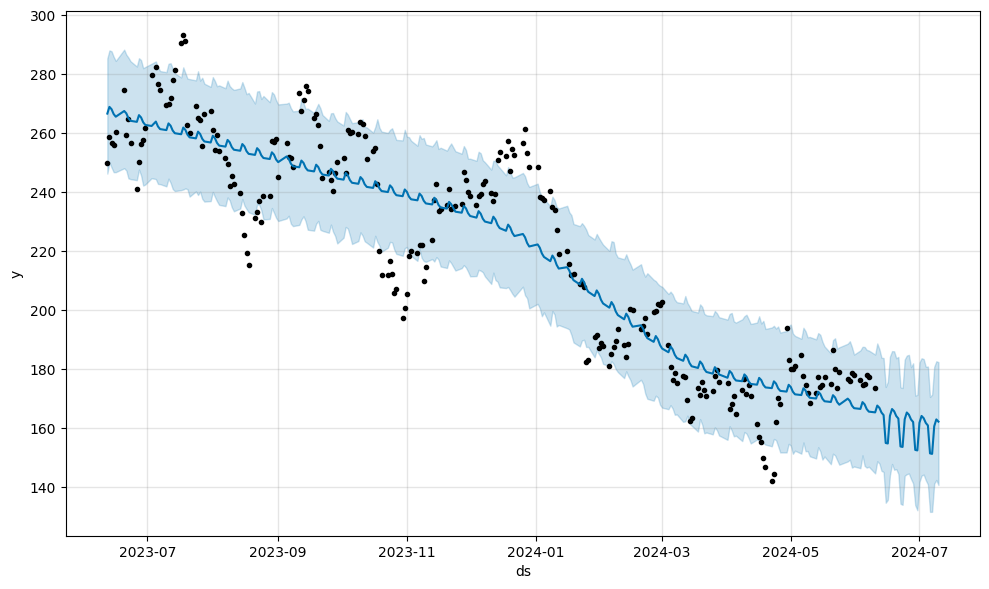

In [26]:
figure = model.plot(forecast, xlabel='ds', ylabel='y')

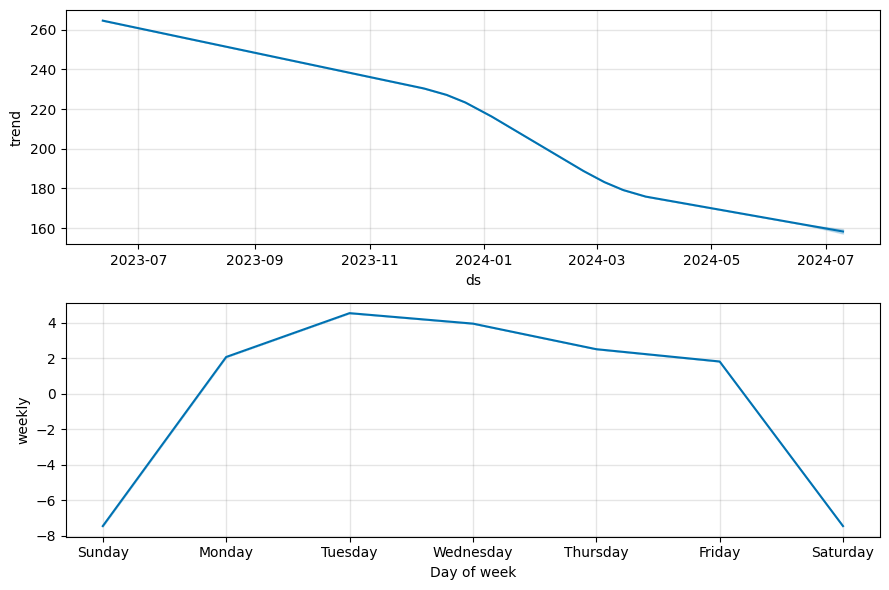

In [29]:
from prophet.plot import plot_components
figure2 = plot_components(model, forecast)#trends

Download the forecast data

In [30]:
from google.colab import files
forecast.to_csv('forecast.csv')
files.download('forecast.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

We can automate the Stock price prediction for other stocks, just download the historical stock price data from  yahoo.finance